# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putu Gio Satria Adinata
- **Email:** putugio16@gmail.com
- **ID Dicoding:** giosatria_16

## Menentukan Pertanyaan Bisnis

- Apakah cuaca berpengaruh terhadap jumlah pengguna sepeda?
- Seperti apa kondisi penggunaan sepeda pada hari kerja, hari libur, dan hari biasa?
- Bagaimana variabel seperti suhu (temp dan atemp), kecepatan angin, serta kelembapan memengaruhi jumlah total pengguna sepeda, baik dari kategori Casual maupun Registered?
- Apakah musim berpengaruh terhadap jumlah penyewa sepeda berdasarkan kategori pelanggan Casual dan Registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

- `numpy`, bertujuan untuk operasi komputasi numerik, terutama dalam menangani array dan operasi matematika.
- `pandas`, bertujuan untuk manipulasi dan analisis data, terutama menggunakan struktur DataFrame dan Series.
- `matplotlib.pyplot`, bertujuan untuk membuat visualisasi data seperti grafik garis, batang, atau sebaran.
- `seaborn`, bertujuan untuk analisis statistik.
- `datetime`, bertujuan untuk bekerja dengan tanggal dan waktu, seperti parsing, format, atau manipulasi data waktu.

## Data Wrangling

### Gathering Data

Load tabel day_df

In [2]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load tabel hour_df

In [3]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dapat membaca file CSV berisi data peminjaman sepeda per hari dan menyimpannya dalam variabel day_df sebagai DataFrame.
- Dapat membaca file CSV berisi data peminjaman sepeda per jam dan menyimpannya dalam variabel hour_df sebagai DataFrame.

### Assessing Data

Pengecekkan tipe data pada tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pengecekkan missing value pada tabel day_df

In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Pengecekkan data duplikat pada tabel day_df

In [6]:
print("Terdapat jumlah duplikasi data sebanyak: ", day_df.duplicated().sum())

Terdapat jumlah duplikasi data sebanyak:  0


Pengecekkan statistik pada tabel day_df

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dapat mengetahui tipe data pada setiap kolom di tabel day_df
- Dapat mengetahui bahwa tidak ada missing value pada tabel day_df
- Dapat mengetahui bahwa tidak ada data duplikat pada tabel day_df

Pengecekkan tipe data pada tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pengecekkan missing value pada tabel hour_df

In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Pengecekkan data duplikat pada tabel hour_df

In [10]:
print("Terdapat jumlah duplikasi data sebanyak: ", hour_df.duplicated().sum())

Terdapat jumlah duplikasi data sebanyak:  0


Pengecekkan statistik pada tabel hour_df

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dapat mengetahui tipe data pada setiap kolom di tabel hour_df
- Dapat mengetahui bahwa tidak ada missing value pada tabel hour_df
- Dapat mengetahui bahwa tidak ada data duplikat pada tabel hour_df

### Cleaning Data

Menghapus tabel hour_df dikarenakan isi data hampir sama dengan tabel day_df

In [12]:
del hour_df

Menghapus kolom instant karena tidak relevan dengan pertanyaan bisnis di atas

In [13]:
drop_col = ['instant']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nama kolom agar mudah dipahami

In [14]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'windspeed': 'wind_speed',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,wind_speed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memberikan keterangan pada data yang berupa angka agar bisa dipahami dengan mudah

In [15]:
day_df['month'] = day_df['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

Penyesuaian tipe data

In [16]:
day_df['dateday'] = pd.to_datetime(day_df.dateday)

day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,wind_speed,casual,registered,count
0,2011-01-01,Spring,0,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menyimpan data terbaru dengan format CSV

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  wind_speed    731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float

In [18]:
day_df.to_csv('days.csv', index='False')

**Insight:**
- Menggunakan day_df saja sudah cukup karena memberikan gambaran harian tanpa duplikasi informasi dari hour_df. Hal ini membuat analisis lebih efisien, terutama jika fokus pada tren harian, mingguan, atau musiman.
- Mengganti tipe data memastikan efisiensi memori dan akurasi analisis.

## Exploratory Data Analysis (EDA)

### Explore Tabel day_df

Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan

In [19]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-19-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
            max   min         mean     sum
month                                     
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

Berdasarkan hasil tersebut, dapat disimpulkan bahwa bulan dengan rata-rata dan jumlah tertinggi adalah bulan Juni, sedangkan bulan dengan rata-rata dan jumlah terendah adalah bulan Januari.

Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca

In [20]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-20-c87e0d584980>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil tersebut, dapat disimpulkan bahwa penyewa sepeda cenderung lebih banyak menyewa saat cuaca cerah atau mendung. Sebaliknya, penyewaan sangat sedikit saat salju turun dan tidak ada sama sekali ketika cuaca sangat buruk.

Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday

In [21]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-21-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil tersebut, dapat disimpulkan bahwa penyewa sepeda cenderung lebih sering menyewa pada hari-hari biasa dibandingkan dengan hari libur.

Membandingkan penyewa sepeda pada saat weekday dan weekend

In [22]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

<ipython-input-22-7bfa45d53d30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

Berdasarkan hasil tersebut, urutan rata-rata jumlah penyewa dari yang terbesar hingga terkecil adalah: Jumat, Kamis, Sabtu, Rabu, Selasa, Senin, dan Minggu.

Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan workingday

In [23]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-23-fb984321fedb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Berdasarkan hasil tersebut, jumlah penyewaan sepeda terbesar terjadi pada hari kerja dibandingkan dengan hari non-kerja. Namun, dapat dilihat juga bahwa perbedaannya cukup terlihat meskipun tidak terlalu signifikan.

Mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season

In [24]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-24-176def68a8e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis tersebut, penyewa sepeda, baik dari kategori Casual maupun Registered, cenderung lebih banyak menyewa pada musim gugur (Fall), sebagaimana terlihat dari rata-ratanya yang tertinggi. Sebaliknya, jumlah penyewa paling sedikit terjadi pada musim semi (Spring), dengan rata-rata yang terendah.

Mengelompokkan temp, hum, wind_speed dan humidity berdasarkan season

In [25]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'wind_speed': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

<ipython-input-25-fdef995811b6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                     wind_speed  \
             max       min      mean       max       min      mean        max   
season                                                                          
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898   0.375617   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914   0.507463   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307   0.388067   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539   0.422275   

                                 hum                      
             min      mean       max       min      mean  
season                                                    
Fall    0.064071  0.172095  0.939565  0.360000  0.633482  
Spring  0.045408  0.214537  0.948261  0.000000  0.582903  
Summer  0.065929  0.203507  0.922500  0.254167  0.626948  
Winter  0.022392  0.171995  0.972500  0.333478  0.668719

Membuat correlation heatmap untuk mengetahui tingkat korelasi

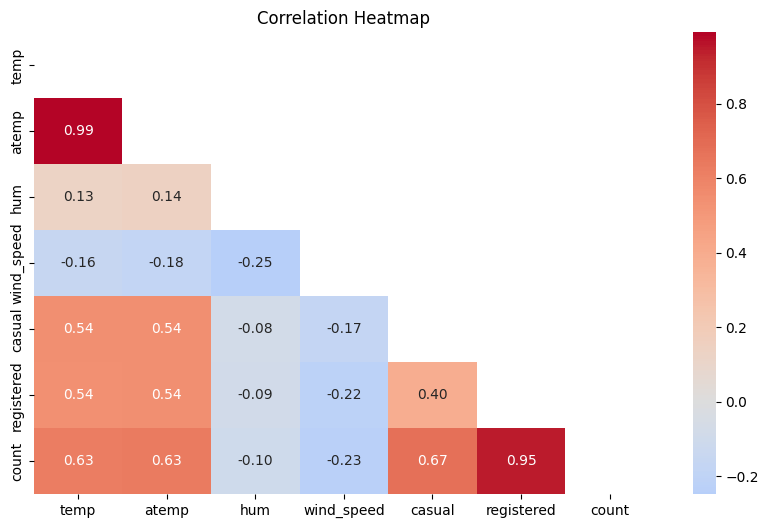

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- temp dan atemp: dengan korelasi sangat tinggi (0.99), yang menunjukkan bahwa keduanya hampir identik. Ini masuk akal karena "atemp" (feels-like temperature) biasanya dihitung dari "temp".
- count dan registered: dengan korelasi tinggi (0.95), menunjukkan bahwa jumlah total pengguna sangat dipengaruhi oleh pengguna terdaftar.
- count dan casual dengan korelasi juga cukup tinggi (0.67), meskipun tidak sebesar registered.
- wind_speed dan count: dengan korelasi negatif (-0.23), menunjukkan bahwa kecepatan angin yang tinggi mungkin sedikit mengurangi jumlah pengguna.
- hum dan count dengan korelasi sangat lemah (-0.10), menunjukkan bahwa kelembaban tidak banyak berpengaruh pada jumlah pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca berpengaruh terhadap jumlah pengguna sepeda?

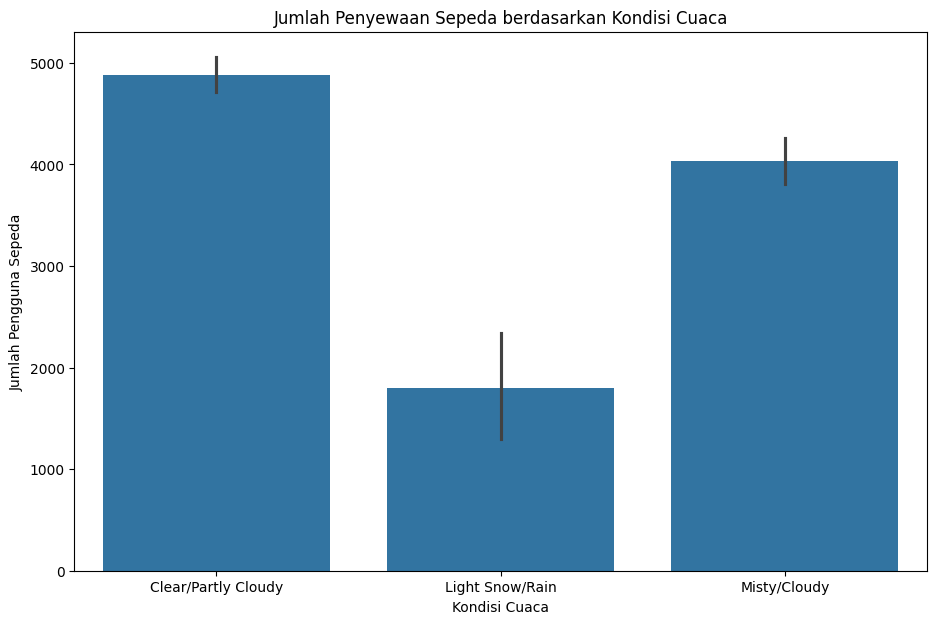

In [27]:
plt.figure(figsize=(11,7))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Insight:
- Berdasarkan visualisasi data di atas menggunakan boxplot yang dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca berkabut/mendung, dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.

### Pertanyaan 2: Seperti apa kondisi penggunaan sepeda pada hari kerja, hari libur, dan hari biasa?

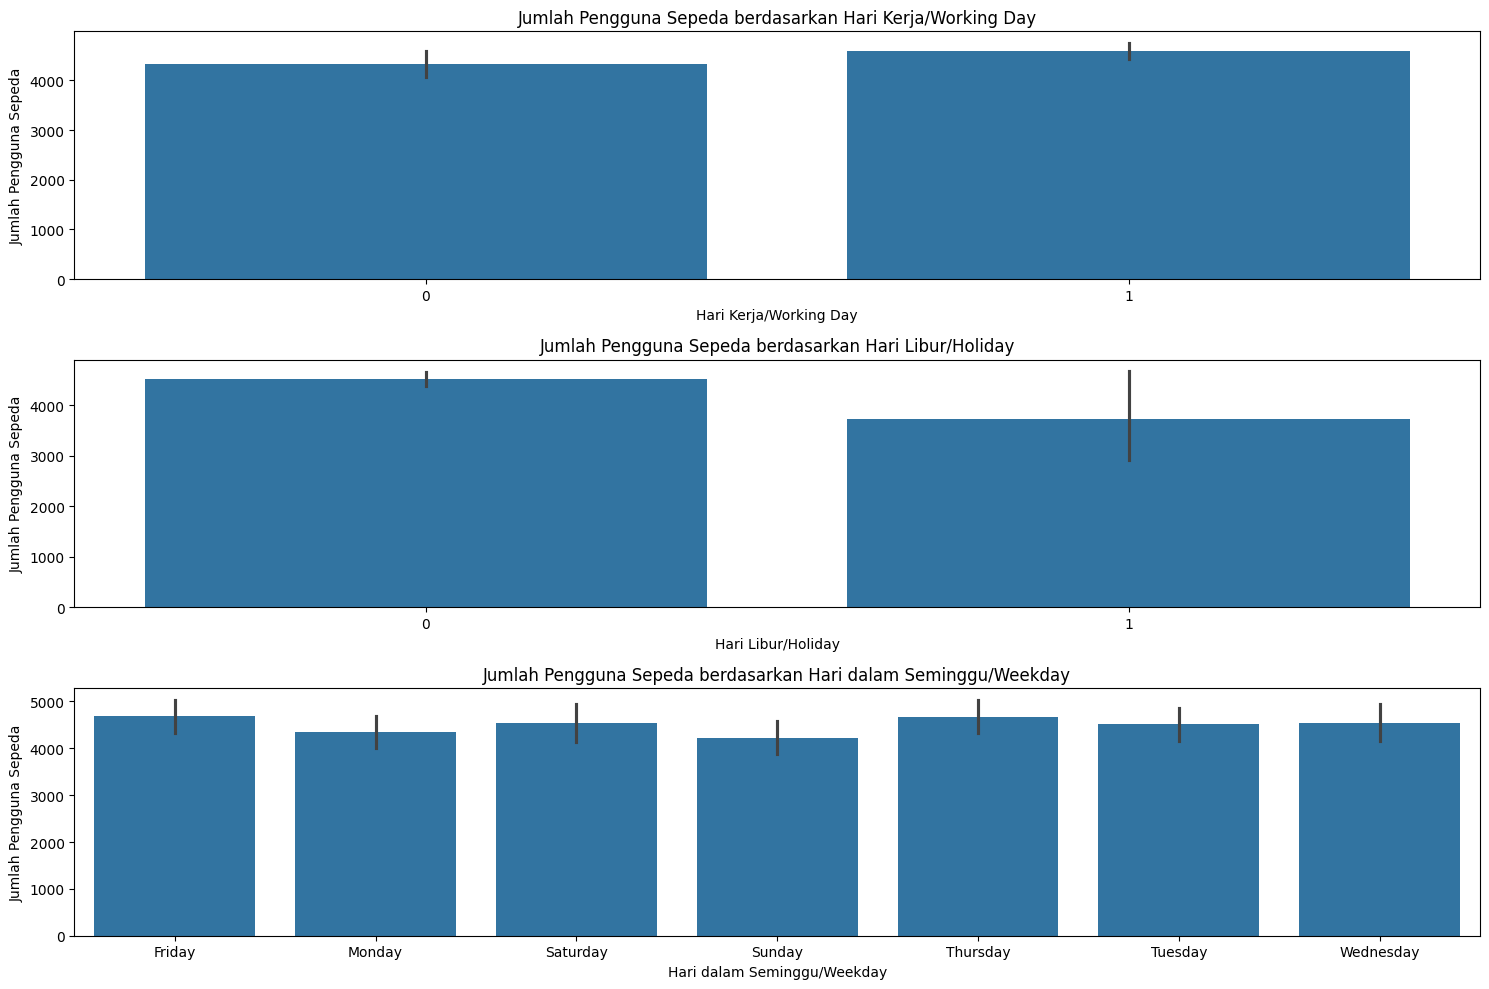

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja/Working Day')
axes[0].set_xlabel('Hari Kerja/Working Day')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur/Holiday')
axes[1].set_xlabel('Hari Libur/Holiday')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu/Weekday')
axes[2].set_xlabel('Hari dalam Seminggu/Weekday')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Insight:
- Berdasarkan visualisasi data di atas menggunakan barplot, diperoleh beberapa temuan sebagai berikut:  
- Jumlah penyewa sepeda cenderung lebih tinggi pada hari kerja (Senin–Jumat) dibandingkan dengan akhir pekan (Sabtu dan Minggu), di mana 0 mewakili akhir pekan dan 1 mewakili hari kerja.  
- Penyewaan sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan dengan hari libur nasional.  
- Jumat menjadi hari dengan jumlah penyewa sepeda terbanyak, sedangkan Minggu menempati posisi terakhir dengan jumlah penyewa sepeda paling sedikit.

### Pertanyaan 3: Bagaimana variabel seperti suhu (temp dan atemp), kecepatan angin, serta kelembapan memengaruhi jumlah total pengguna sepeda, baik dari kategori Casual maupun Registered?


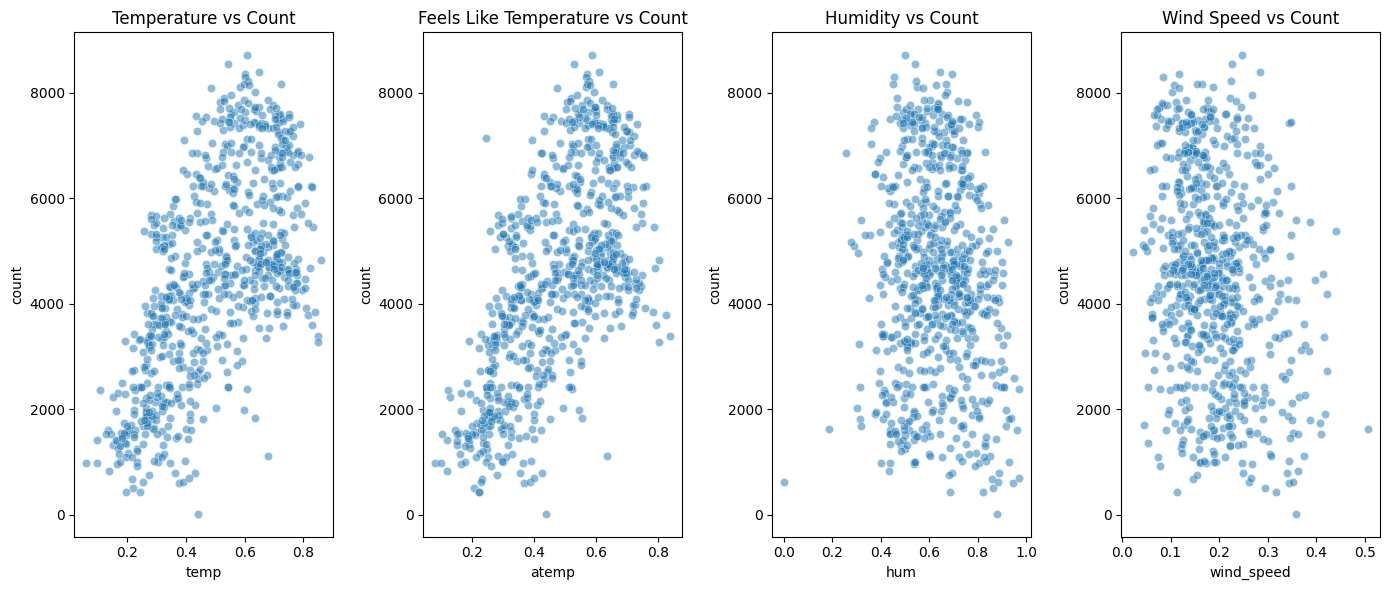

In [29]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 4, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 4, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 4, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

# Scatter plot untuk 'wind_speed' vs 'count'
plt.subplot(1, 4, 4)
sns.scatterplot(
    x='wind_speed',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Wind Speed vs Count')

plt.tight_layout()
plt.show()

Insight:
- Temperature vs Count: terlihat pola hubungan positif: semakin tinggi suhu, jumlah peminjaman cenderung meningkat. Hal ini bisa menunjukkan bahwa orang lebih suka bersepeda saat cuaca hangat.
- Feels Like Temperature vs Count: polanya mirip dengan suhu sebenarnya, yang masuk akal karena "atemp" (feels like temperature) adalah persepsi suhu oleh manusia. Hubungan positif ini memperkuat temuan bahwa cuaca yang lebih hangat mendorong lebih banyak peminjaman.
- Humidity vs Count: hubungan terlihat lebih acak, tidak ada pola yang jelas.
Ini bisa menunjukkan bahwa kelembapan tidak terlalu memengaruhi keputusan orang untuk meminjam sepeda.
- Wind Speed vs Count: tidak ada pola yang jelas, mirip dengan kelembapan.
Kecepatan angin mungkin tidak menjadi faktor utama dalam keputusan pengguna.

### Pertanyaan 4: Apakah musim berpengaruh terhadap jumlah penyewa sepeda berdasarkan kategori pelanggan Casual dan Registered?



<ipython-input-30-4f4606487379>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


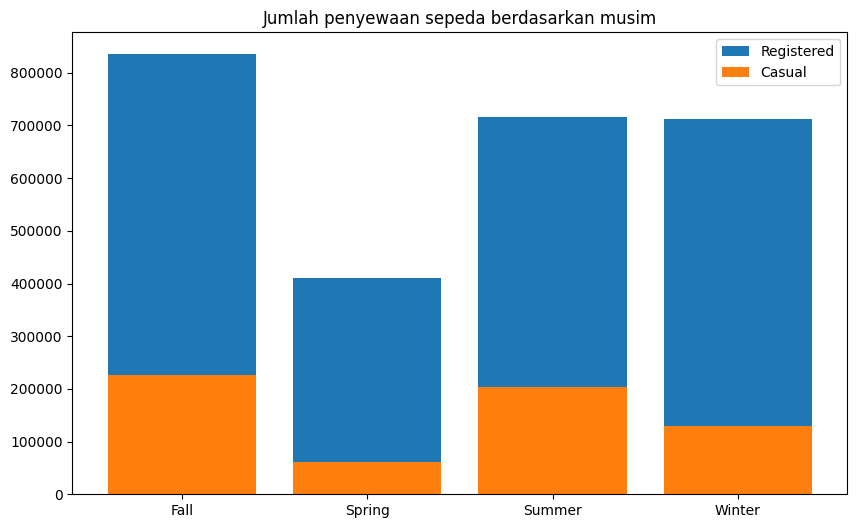

In [30]:
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

- Fall (Musim Gugur) memiliki jumlah penyewaan tertinggi, baik untuk penyewa terdaftar maupun casual.
- Spring (Musim Semi) memiliki jumlah penyewaan terendah.
- Summer (Musim Panas) dan Winter (Musim Dingin) memiliki jumlah penyewaan yang mirip, tetapi di Summer penyewa casual lebih banyak dibandingkan Winter.

## Conclusion

- Conclution pertanyaan 1: berdasarkan visualisasi pertanyaan pertama, dapat disimpulkan bahwa jumlah pengguna sepeda paling banyak terjadi saat cuaca cerah atau berawan sebagian (*Clear/Partly Cloudy*), diikuti oleh cuaca berkabut atau mendung (*Misty/Cloudy*). Sementara itu, kondisi cuaca dengan jumlah pengguna sepeda paling sedikit adalah saat terjadi hujan ringan atau salju ringan (*Light Snow/Rain*). Hal ini menunjukkan bahwa kondisi cuaca yang lebih baik cenderung mendorong lebih banyak orang untuk bersepeda.
- Conclution pertanyaan 2: Berdasarkan visualisasi di atas, dapat disimpulkan bahwa jumlah pengguna sepeda cenderung lebih banyak pada hari kerja dibandingkan akhir pekan, mengindikasikan bahwa sepeda lebih sering dimanfaatkan sebagai sarana transportasi untuk aktivitas rutin. Selain itu, penggunaan sepeda pada hari biasa juga lebih tinggi dibandingkan saat hari libur nasional, yang menunjukkan bahwa sepeda lebih dominan digunakan untuk kegiatan sehari-hari daripada rekreasi saat libur. Dalam pola mingguan, Jumat menjadi hari dengan jumlah pengguna tertinggi, kemungkinan berkaitan dengan peningkatan aktivitas sebelum akhir pekan, sedangkan Minggu memiliki jumlah pengguna terendah, mencerminkan penurunan aktivitas bersepeda di hari tersebut. Secara keseluruhan, pola ini menunjukkan bahwa penggunaan sepeda lebih banyak terkait dengan mobilitas harian selama hari kerja.
- Conclusion pertanyaan 3: Berdasarkan visualisasi di atas, terdapat beberapa hubungan antara faktor cuaca dengan jumlah pengguna sepeda. Pertama, suhu udara (*temperature*) dan suhu yang dirasakan (*feels like temperature*) menunjukkan hubungan positif dengan jumlah pengguna sepeda, di mana peningkatan suhu cenderung diikuti oleh peningkatan jumlah pengguna. Sebaliknya, kelembapan (*humidity*) tampak memiliki hubungan yang cenderung negatif, di mana jumlah pengguna cenderung menurun saat kelembapan meningkat. Sementara itu, kecepatan angin (*wind speed*) tidak menunjukkan pola hubungan yang jelas dengan jumlah pengguna, yang mengindikasikan bahwa faktor ini mungkin memiliki pengaruh yang lebih kecil dibandingkan suhu dan kelembapan. Analisis ini memberikan wawasan bahwa kondisi cuaca tertentu dapat memengaruhi minat masyarakat dalam menggunakan sepeda.
- Conclusion pertanyaan 4: Berdasarkan visualisasi di atas, jumlah penyewaan sepeda bervariasi di setiap musim dengan pola yang menarik antara pengguna terdaftar (*Registered*) dan pengguna kasual (*Casual*). Musim gugur (*Fall*) mencatat jumlah penyewaan tertinggi, baik dari pengguna terdaftar maupun kasual. Musim panas (*Summer*) dan musim dingin (*Winter*) memiliki jumlah penyewaan yang hampir setara, meskipun pengguna kasual lebih banyak di musim panas dibandingkan musim dingin. Sebaliknya, musim semi (*Spring*) menunjukkan jumlah penyewaan terendah di antara semua musim, dengan kontribusi pengguna kasual yang sangat kecil. Secara keseluruhan, pengguna terdaftar mendominasi jumlah penyewaan di semua musim, tetapi pengguna kasual cenderung meningkat di musim yang lebih hangat seperti musim gugur dan musim panas. Hal ini menunjukkan bahwa faktor musiman memengaruhi pola penyewaan sepeda, khususnya bagi pengguna kasual.